In [122]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data_path = "data.xlsx"
data = pd.read_excel(data_path)
data.head()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14


## Q1 

In [47]:
advertising_group = data[data["test"] == 1]
advertising_group.head()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
0,1069124,1,0,130,1,20
1,1119715,1,0,93,2,22
2,1144181,1,0,21,2,18
3,1435133,1,0,355,2,10
4,1015700,1,0,276,5,14


In [48]:
num_converted_ads = advertising_group[advertising_group["converted"] == 1]
converted_ads = len(num_converted_ads)
total_ads = len(advertising_group)
print("Number of consumers shown ads: ", total_ads)
print("Number of consumers conveted from ads: ", converted_ads)

Number of consumers shown ads:  564577
Number of consumers conveted from ads:  14423


In [49]:
perc_people_bought_ads = converted_ads / total_ads
print("Percentage conversion with ads: ", perc_people_bought_ads * 100, "%")

Percentage conversion with ads:  2.5546559636683748 %


In [50]:
control_group = data[data["test"] == 0]
control_group.head()

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
18,900681,0,0,248,6,19
38,905704,0,0,27,4,8
68,904595,0,0,13,2,19
140,901904,0,0,32,3,19
157,902234,0,0,105,2,19


In [51]:
num_converted_no_ads = control_group[control_group["converted"] == 1]
converted_no_ads = len(num_converted_no_ads)
total_no_ads = len(control_group)
print("Number of consumers in control group: ", total_no_ads)
print("Number of consumers converted from control group: ", converted_no_ads)

Number of consumers in control group:  23524
Number of consumers converted from control group:  420


In [52]:
perc_people_bought_control = converted_no_ads / total_no_ads
print("Percentage converted from control: ", perc_people_bought_control * 100, "%")

Percentage converted from control:  1.785410644448223 %


Yes, the advertising campaign was effective because `perc_people_bought_ads` > `perc_people_bought_control`. Due to the same reason, we can say that additional consumers converted as a result of the ad campaign.

## Q2 a)

In [53]:
# This variable depicts the purses that would have been sold if ads weren't sent
purses_ads_not_sent = perc_people_bought_control * total_ads

purses_actually_sold = converted_ads

diff_purses = purses_actually_sold - purses_ads_not_sent

converting_user_worth = 40
more_money_made = diff_purses * converting_user_worth

In [54]:
print("More money made by Taskabella by running the campaign: $" + str(more_money_made))

More money made by Taskabella by running the campaign: $173719.28583574225


## Q2 b)

In [55]:
total_impressions_sent = data["tot_impr"].sum()
total_impr_per_thousand = total_impressions_sent / 1000
cost_CPM = 9
cost_of_campaign = total_impr_per_thousand * cost_CPM

In [56]:
print("Cost of the campaign is $" + str(cost_of_campaign))

Cost of the campaign is $131374.638


## Q2 c)

In [57]:
ROI = (more_money_made - cost_of_campaign) / cost_of_campaign

In [58]:
print("Return on investment is:", str(ROI * 100) + "%")
print("Yes, the campaign was profitable.")

Return on investment is: 32.2319806017218%
Yes, the campaign was profitable.


## Q2 d)

In [59]:
purses_sold_control = converted_no_ads
purses_sold_control_ads = perc_people_bought_ads * total_no_ads

diff_control_purses = purses_sold_control_ads - purses_sold_control

opportunity_cost = diff_control_purses * 40

In [60]:
print("Opporunity Cost of adding a control variable: $" +  str(opportunity_cost))

Opporunity Cost of adding a control variable: $7238.290755733938


## Q3 a)

In [258]:
def plot_graph(group_conv_rate, group_edges):
    x_labels_compute = []
    for i in range(len(group_edges)):
        x_labels_compute.append(str(group_edges[i][0]) + "-" + str(group_edges[i][1]))

    plt.bar(x_labels_compute, group_conv_rate)
    plt.xticks(rotation = 30)
    plt.xlabel("Total Impressions")
    plt.ylabel("Conversion Percentage %")
    plt.title("Converstion Percentage vs Total Impressions")
    plt.show()

In [259]:
def compute_graphs(dataframe):
    curr_df = dataframe.copy()
    curr_df["groups"] = pd.cut(curr_df["tot_impr"], bins = 7)
    group_conversion_rate = (curr_df.groupby("groups")["converted"].sum() / curr_df.groupby("groups")["converted"].count()) * 100
    
    group_edges = []
    for curr_group in curr_df["groups"].cat.categories:
        leftval = 0
        if curr_group.left >= 0:
            leftval = int(curr_group.left)
        group_edges.append((leftval, int(curr_group.right)))

    plot_graph(group_conversion_rate, group_edges)


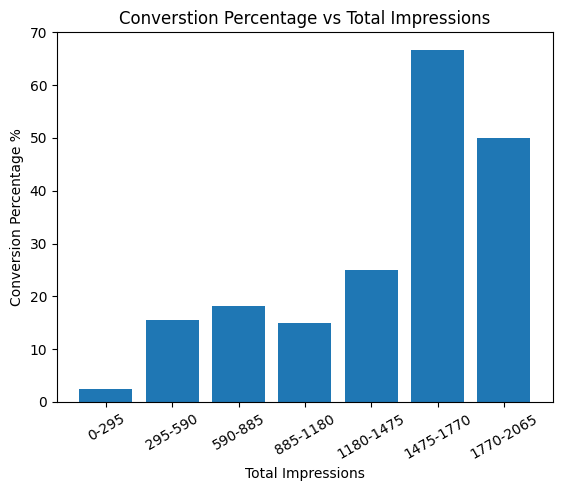

In [260]:
compute_graphs(advertising_group)

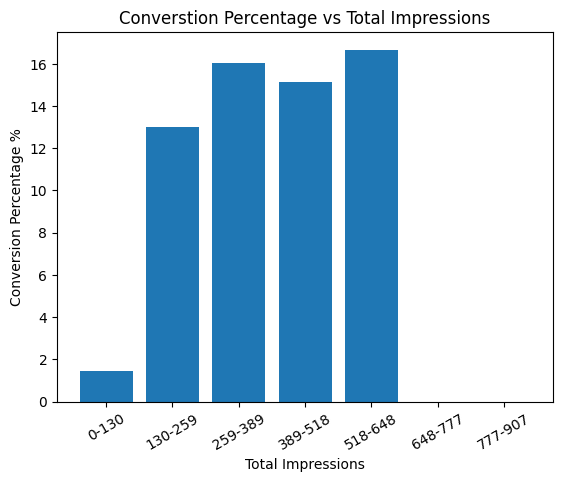

In [261]:
compute_graphs(control_group)